In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
'''
+----------------------------------------------------------------------------------------+
| Field	         | Description
| __time__	     | TimeStamp in seconds
| functionName	 | Unique id for the function name
| latency	     | Function cold start latency1 in seconds
| runtime	     | Function runtime (Python, nodejs, custom-runtime, etc)
| memoryMB	     | Function's allocated memory in MB
+----------------------------------------------------------------------------------------+
'''

In [19]:
data=pd.read_csv(r'data/region_01.csv')
data.head()

,Unnamed: 0,__time__,functionName,latency,runtime,memoryMB
0,0,1620489600,a9edb01dd99821162b67fbe590c7a961,914.149029,php7.2,512
1,1,1620489600,81a92affd3f236647999d1fb5f715d84,719.684061,python3,512
2,2,1620489600,3a22c9ea9a3039d180e0a514a5a3b619,5251.875852,custom,512
3,3,1620489600,1952a01898073d1e561b9b4f2e42cbd7,13040.219307,python3,256
4,4,1620489600,514665440903686ba22a79f42691041e,539.851082,nodejs6,128


In [20]:
len(data)

440953

In [21]:
data.dropna(inplace=True)

In [22]:
len(data)

440953

In [23]:
data.memoryMB.value_counts().sort_index()

memoryMB
128       76386
192       16063
256       78465
320        1859
384         797
448         852
512      146365
704           6
768        7875
832         346
896         106
960           6
1024      44144
1152         57
1216       7177
1536         28
1600          2
1664        108
1856          1
2048       9711
3072      43070
4096       2749
12288      4262
16384        57
32768       461
Name: count, dtype: int64

In [24]:
data=data[['runtime', 'latency', 'memoryMB']]
data.head()

,runtime,latency,memoryMB
0,php7.2,914.149029,512
1,python3,719.684061,512
2,custom,5251.875852,512
3,python3,13040.219307,256
4,nodejs6,539.851082,128


In [25]:
data.columns=['runc_type', 'latency', 'memory']
data.head()

,runc_type,latency,memory
0,php7.2,914.149029,512
1,python3,719.684061,512
2,custom,5251.875852,512
3,python3,13040.219307,256
4,nodejs6,539.851082,128


In [26]:
#1.筛选出所有占用缓存<=4G的函数
data=data[data['memory']<=4096]
data.head()

,runc_type,latency,memory
0,php7.2,914.149029,512
1,python3,719.684061,512
2,custom,5251.875852,512
3,python3,13040.219307,256
4,nodejs6,539.851082,128


In [27]:
data.memory.value_counts().sort_index()

memory
128      76386
192      16063
256      78465
320       1859
384        797
448        852
512     146365
704          6
768       7875
832        346
896        106
960          6
1024     44144
1152        57
1216      7177
1536        28
1600         2
1664       108
1856         1
2048      9711
3072     43070
4096      2749
Name: count, dtype: int64

In [28]:
len(data)

436173

In [30]:
data.runc_type.value_counts()

runc_type
python3             160427
python2.7            47089
nodejs12             42352
nodejs10             41216
java8                40661
nodejs8              33766
debian8              33321
php7.2               21758
custom                6722
golang1.8             3126
nodejs6               1841
java11                1707
custom-container      1568
nodejs4.4              310
dotnetcore2.1          309
Name: count, dtype: int64

In [31]:
#2.对函数类型进行删除与合并->["nodejs", "python", "php", "java", "golang", ".net"]
data=data[~data['runc_type'].isin(['debian8', 'custom', 'custom-container'])]
data.head()

,runc_type,latency,memory
0,php7.2,914.149029,512
1,python3,719.684061,512
3,python3,13040.219307,256
4,nodejs6,539.851082,128
5,python2.7,480.386264,512


In [32]:
len(data)

394562

In [33]:
data.runc_type.value_counts()

runc_type
python3          160427
python2.7         47089
nodejs12          42352
nodejs10          41216
java8             40661
nodejs8           33766
php7.2            21758
golang1.8          3126
nodejs6            1841
java11             1707
nodejs4.4           310
dotnetcore2.1       309
Name: count, dtype: int64

In [34]:
data.loc[data['runc_type'].isin(['python3', 'python2.7']), 'runc_type']='python'
data.loc[data['runc_type'].isin(['nodejs12', 'nodejs10', 'nodejs8', 'nodejs6', 'nodejs4.4']), 'runc_type']='nodejs'
data.loc[data['runc_type'].isin(['java8', 'java11']), 'runc_type']='java'
data.loc[data['runc_type'].isin(['php7.2']), 'runc_type']='php'
data.loc[data['runc_type'].isin(['golang1.8']), 'runc_type']='golang'
data.loc[data['runc_type'].isin(['dotnetcore2.1']), 'runc_type']='.net'
data.head()

,runc_type,latency,memory
0,php,914.149029,512
1,python,719.684061,512
3,python,13040.219307,256
4,nodejs,539.851082,128
5,python,480.386264,512


In [35]:
data.runc_type.value_counts()

runc_type
python    207516
nodejs    119485
java       42368
php        21758
golang      3126
.net         309
Name: count, dtype: int64

In [36]:
len(data)

394562

In [38]:
data.loc[data['runc_type'].isin(['nodejs']), 'runc_type']='node.js'

In [39]:
data.runc_type.value_counts()

runc_type
python     207516
node.js    119485
java        42368
php         21758
golang       3126
.net          309
Name: count, dtype: int64

In [40]:
len(data)

394562

In [41]:
data.head(15)

,runc_type,latency,memory
0,php,914.149029,512
1,python,719.684061,512
3,python,13040.219307,256
4,node.js,539.851082,128
5,python,480.386264,512
6,python,650.582275,128
7,python,701.448921,128
8,python,509.871007,256
9,python,378.474273,128
10,node.js,552.788848,512


In [42]:
data['latency']=(data['latency']/1000).round()
data['latency']=data['latency'].replace(0.0, 1.0)
data.head(15)

/tmp/ipykernel_1749308/1809377225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['latency']=(data['latency']/1000).round()
/tmp/ipykernel_1749308/1809377225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['latency']=data['latency'].replace(0.0, 1.0)


,runc_type,latency,memory
0,php,1.0,512
1,python,1.0,512
3,python,13.0,256
4,node.js,1.0,128
5,python,1.0,512
6,python,1.0,128
7,python,1.0,128
8,python,1.0,256
9,python,1.0,128
10,node.js,1.0,512


In [43]:
data.latency.mean()

5.030930500149533

In [44]:
data.latency.median()

2.0

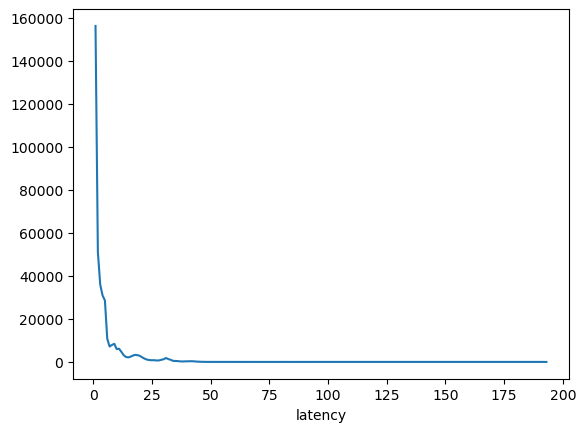

In [45]:
data.latency.value_counts().sort_index().plot(kind='line')
plt.show()

In [46]:
data.groupby('runc_type')['latency'].mean()

runc_type
.net        1.000000
golang      1.174344
java       10.564601
node.js     4.215517
php         1.419202
python      4.813426
Name: latency, dtype: float64

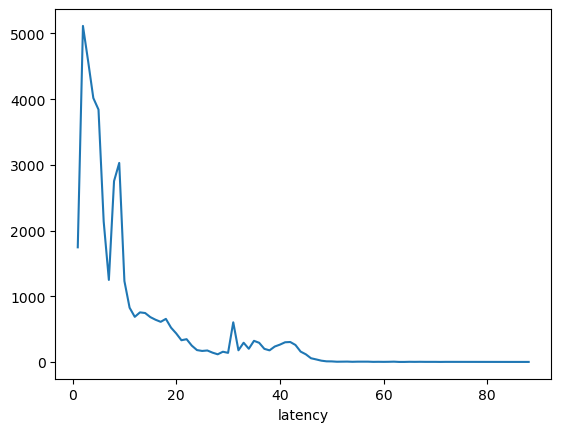

In [47]:
data[data['runc_type']=='java']['latency'].value_counts().sort_index().plot(kind='line')
plt.show()

In [48]:
#3.筛选出所有冷启动时间<=20的函数
data=data[data['latency']<=20.0]
data.head()

,runc_type,latency,memory
0,php,1.0,512
1,python,1.0,512
3,python,13.0,256
4,node.js,1.0,128
5,python,1.0,512


In [49]:
data.runc_type.value_counts()

runc_type
python     196497
node.js    118086
java        36257
php         21758
golang       3126
.net          309
Name: count, dtype: int64

In [51]:
data.latency.value_counts().sort_index()

latency
1.0     156221
2.0      51156
3.0      35965
4.0      30917
5.0      28566
6.0      10740
7.0       7166
8.0       7889
9.0       8414
10.0      5997
11.0      6146
12.0      4712
13.0      3114
14.0      2288
15.0      2105
16.0      2483
17.0      3004
18.0      3276
19.0      3127
20.0      2747
Name: count, dtype: int64

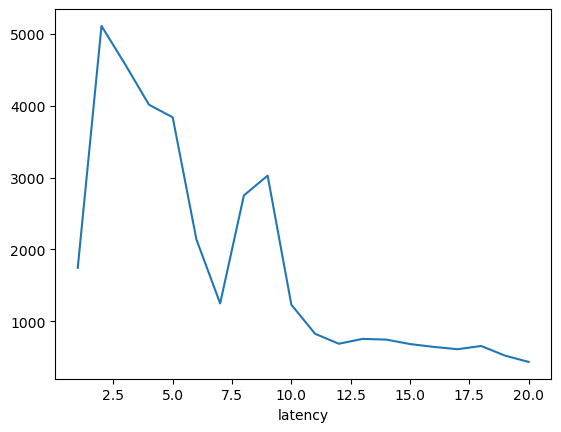

In [50]:
data[data['runc_type']=='java']['latency'].value_counts().sort_index().plot(kind='line')
plt.show()

In [52]:
data.reset_index(drop=True, inplace=True)
data.head()

,runc_type,latency,memory
0,php,1.0,512
1,python,1.0,512
2,python,13.0,256
3,node.js,1.0,128
4,python,1.0,512


In [53]:
data['memory']=data['memory'].astype(np.float64)
data.dtypes

runc_type     object
latency      float64
memory       float64
dtype: object

In [54]:
data.head(15)

,runc_type,latency,memory
0,php,1.0,512.0
1,python,1.0,512.0
2,python,13.0,256.0
3,node.js,1.0,128.0
4,python,1.0,512.0
5,python,1.0,128.0
6,python,1.0,128.0
7,python,1.0,256.0
8,python,1.0,128.0
9,node.js,1.0,512.0


In [55]:
len(data)

376033

In [39]:
data.to_csv("temp/func-data-v1.0.csv")

In [41]:
data.to_pickle("temp/func-data-v1.0.pkl")

In [57]:
data.runc_type.value_counts()

runc_type
python     196497
node.js    118086
java        36257
php         21758
golang       3126
.net          309
Name: count, dtype: int64

In [58]:
data.latency.value_counts().sort_index()

latency
1.0     156221
2.0      51156
3.0      35965
4.0      30917
5.0      28566
6.0      10740
7.0       7166
8.0       7889
9.0       8414
10.0      5997
11.0      6146
12.0      4712
13.0      3114
14.0      2288
15.0      2105
16.0      2483
17.0      3004
18.0      3276
19.0      3127
20.0      2747
Name: count, dtype: int64

In [59]:
data.memory.value_counts().sort_index()

memory
128.0      75952
192.0      11454
256.0      66452
320.0       1813
384.0        785
448.0        852
512.0     112605
704.0          6
768.0       7875
832.0        346
960.0          6
1024.0     40158
1152.0        54
1216.0      7177
1536.0        25
1600.0         2
1664.0       108
1856.0         1
2048.0      9659
3072.0     37954
4096.0      2749
Name: count, dtype: int64

In [60]:
data.head(15)

,runc_type,latency,memory
0,php,1.0,512.0
1,python,1.0,512.0
2,python,13.0,256.0
3,node.js,1.0,128.0
4,python,1.0,512.0
5,python,1.0,128.0
6,python,1.0,128.0
7,python,1.0,256.0
8,python,1.0,128.0
9,node.js,1.0,512.0


In [61]:
data.tail(15)

,runc_type,latency,memory
376018,python,3.0,512.0
376019,python,3.0,512.0
376020,php,1.0,128.0
376021,python,12.0,256.0
376022,python,10.0,256.0
376023,python,1.0,512.0
376024,python,1.0,512.0
376025,python,12.0,256.0
376026,python,12.0,320.0
376027,java,20.0,192.0


In [62]:
len(data)

376033

In [ ]:
data.to_pickle(r"temp/func.pkl")